In [1]:
# import necessary packages
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
# helper function to strip the band's ID from the file name
def id_stripper(file_name, file_path):
  band_id = []
  i = len(file_path)
  while file_name[i] != '_':
    band_id.append(file_name[i])
    i+=1
  return ''.join(band_id)

In [3]:
# helper function that returns the paths to the images I have in colab
def image_paths(local_download_path):
  file_paths = []

  for filename in os.listdir(local_download_path):
      if filename.endswith('.jpg'):
          file_paths.append(local_download_path + filename)


  return file_paths


paths = image_paths('/content/drive/MyDrive/Logos/Small_Dataset/')
print(len(paths))

14686


In [5]:
bands_df = pd.read_csv('/content/drive/MyDrive/Logos/metallum_bands.csv', low_memory=False)
bands_df.head()

,Band ID,Name,Country,Genre
0,3540442600,A // Solution,United States,Crust Punk/Thrash Metal
1,3540525193,A Black Cold Diamond,Colombia,Heavy/Doom Metal
2,3540473101,A Billion Limbs,United Kingdom,Groove Metal/Deathcore
3,3540535978,A Band Named Jon,United States,Brutal Death Metal/Grindcore
4,3540352307,A Balance of Power,United States,Melodic Death Metal/Metalcore


In [6]:
#this will return the (image, label) pair for any of image
def get_label(img, df = bands_df):
  id = id_stripper(img, '/content/drive/MyDrive/Logos/Small_Dataset/')

  row = df[df.isin([id]).any(axis=1)]
  name = row['Name'].iloc[0]
  genre = row['Genre'].iloc[0]
  location = row['Country'].iloc[0]

  label = (f"This is an image of the logo for {str(name)},"
        f" who are a {str(genre)} band from {str(location)}."
        f" The band ID for this band is {str(id)}.")

  return label

Label: This is an image of the logo for 200 Stab Wounds, who are a Death Metal band from United States. The band ID for this band is 3540465014.
Logo: 


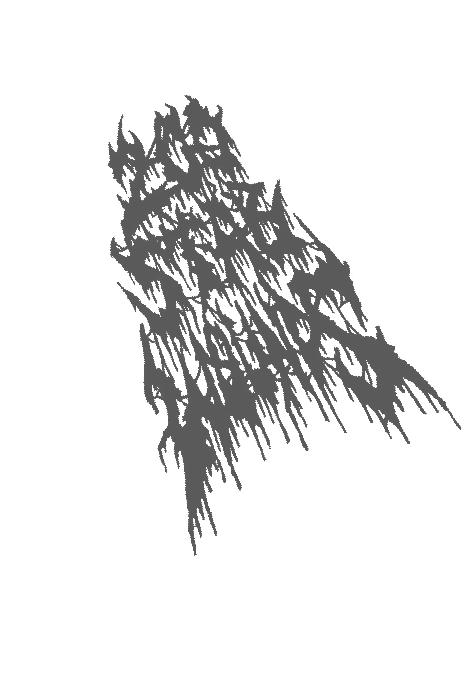

In [7]:
# test it
test_label = get_label('/content/drive/MyDrive/Logos/Small_Dataset/3540465014_logo2.jpg')
print(f'Label: {test_label}')
print('Logo: ')
img = Image.open('/content/drive/MyDrive/Logos/Small_Dataset/3540465014_logo2.jpg')
display(img)

In [8]:
# Example list of band IDs you want to check
band_ids_to_check = [id_stripper(path, '/content/drive/MyDrive/Logos/Small_Dataset/') for path in paths]

band_ids_to_check = list(set(band_ids_to_check))
print(len(band_ids_to_check))

686


In [9]:
# Find which Band IDs are not in the DataFrame
missing_band_ids = [band_id for band_id in band_ids_to_check if band_id not in bands_df['Band ID'].values]

In [10]:
# should be empty list
print(missing_band_ids)

[]


In [11]:
labels = []
for path in paths:
  labels.append((path, get_label(path)))
  print(f'Path: {path}')
  print(f' Label: {get_label(path)}')

df = pd.DataFrame(labels, columns=['Image', 'Caption'])
df.to_csv('annotated_small_dataset.csv', index=False)

Streaming output truncated to the last 5000 lines.
Path: /content/drive/MyDrive/Logos/Small_Dataset/3540503437_logo10.jpg
 Label: This is an image of the logo for Inception, who are a Progressive Death Metal band from Brazil. The band ID for this band is 3540503437.
Path: /content/drive/MyDrive/Logos/Small_Dataset/3540503437_logo11.jpg
 Label: This is an image of the logo for Inception, who are a Progressive Death Metal band from Brazil. The band ID for this band is 3540503437.
Path: /content/drive/MyDrive/Logos/Small_Dataset/3540503437_logo12.jpg
 Label: This is an image of the logo for Inception, who are a Progressive Death Metal band from Brazil. The band ID for this band is 3540503437.
Path: /content/drive/MyDrive/Logos/Small_Dataset/3540503437_logo13.jpg
 Label: This is an image of the logo for Inception, who are a Progressive Death Metal band from Brazil. The band ID for this band is 3540503437.
Path: /content/drive/MyDrive/Logos/Small_Dataset/3540503437_logo14.jpg
 Label: This i

In [12]:
df.head()

,Image,Caption
0,/content/drive/MyDrive/Logos/Small_Dataset/956...,"This is an image of the logo for Ossuary, who ..."
1,/content/drive/MyDrive/Logos/Small_Dataset/956...,"This is an image of the logo for Ossuary, who ..."
2,/content/drive/MyDrive/Logos/Small_Dataset/956...,"This is an image of the logo for Ossuary, who ..."
3,/content/drive/MyDrive/Logos/Small_Dataset/956...,"This is an image of the logo for Ossuary, who ..."
4,/content/drive/MyDrive/Logos/Small_Dataset/354...,"This is an image of the logo for Mayhem, who a..."


In [13]:
print(len(df))

14686
